In [2]:
import time
from selenium import webdriver
import numpy as np    
import pandas as pd

import matplotlib.pyplot as plt


In [3]:
df = pd.read_json('baseDeDadosHackathonTCE.json').T.reset_index(drop=True)

In [4]:
df.head()

,beneficiario,destino,exercicio,motivo,nEmpenho,periodo,situacaoEmpenho,unidadeOrcamentaria,valorTotalDiario
0,JOSE WILLYS PAZ ALBURQUERQUE,ARACOIABA-CE,2014,"REALIZAR FISCALIZACAO EM CRONOTACOGRAFOS, NA C...",1189,08/10/2014 a 09/10/2014,Pago,19.203-INSTITUTO DE PESOS E MEDIDAS DE FORTALEZA,"352,36"
1,MARIANA CARVALHO GOMES,BRASILIA-DF,2014,"VALOR REFERENTE A QUATRO DIARIAS DA REGIAO II,...",0538,07/12/2014 a 10/12/2014,Pago,30.101-SECRETARIA MUNICIPAL DE TURISMO DE FORT...,"1.920,00"
2,LUIZ WAGNER BARBOSA DA SILVA,ARACAS-CE,2014,REALIZAR VERIFICACAO EM MEDIDORES DE VELOCIDAD...,1179,08/10/2014 a 10/10/2014,Pago,19.203-INSTITUTO DE PESOS E MEDIDAS DE FORTALEZA,"528,54"
3,FERNANDO ROSSAS FREIRE,RIO DE JANEIRO-RJ,2014,"PAGAMENTO DE 4,5 DIARIAS ADMINISTRATIVAS PARA ...",1059,10/11/2014 a 10/11/2014,Pago,19.203-INSTITUTO DE PESOS E MEDIDAS DE FORTALEZA,"2.949,95"
4,ALEXANDRE SAMPAIO GUIZARDI,BRASILIA-DF,2014,PARTICIPAR DO WORSKSHOP COPA DO MUNDO FIFA 201...,0038,16/02/2014 a 17/02/2014,Pago,52.101-SECRETARIA MUNICIPAL EXTRAORDINARIA DA ...,"960,00"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8242 entries, 0 to 8241
Data columns (total 9 columns):
beneficiario           8242 non-null object
destino                8242 non-null object
exercicio              8242 non-null object
motivo                 8242 non-null object
nEmpenho               8242 non-null object
periodo                8242 non-null object
situacaoEmpenho        8242 non-null object
unidadeOrcamentaria    8242 non-null object
valorTotalDiario       8242 non-null object
dtypes: object(9)
memory usage: 579.6+ KB


In [6]:
df.describe()

,beneficiario,destino,exercicio,motivo,nEmpenho,periodo,situacaoEmpenho,unidadeOrcamentaria,valorTotalDiario
count,8242,8242,8242,8242,8242,8242,8242,8242,8242
unique,976,444,6,5283,1902,3056,5,67,609
top,ANTONIO LUIZ PEREIRA FRANCO,BRASILIA-DF,2017,DIARIAS PARA REALIZAR VERIFICACOES FISCALIZACO...,0058,09/08/2015 a 11/08/2015,Pago,19.203-INSTITUTO DE PESOS E MEDIDAS,"1.100,00"
freq,250,1446,1629,55,14,46,7814,3762,567


In [28]:
pd.value_counts(df["situacaoEmpenho"])

0    7814
1     285
2      88
3      42
4      13
Name: situacaoEmpenho, dtype: int64

In [58]:
aux = df[df['destino'] == "BRASILIA-DF"]

In [60]:
aux[aux['valorTotalDiario'] == 5850.000000]['motivo'].iloc[0]

'PARTICIPAR DO 54O ESTAGIO ESPECIAL DE INTELIGENCIA PARA ORGAOS CIVIS.                                                                                                                                                                                          '

In [39]:
pd.value_counts(df["destino"])

BRASILIA-DF                                  1446
SAO PAULO-SP                                  517
CAUCAIA-CE                                    290
MARACANAU-CE                                  273
RIO DE JANEIRO-RJ                             234
AQUIRAZ-CE                                    211
EUSEBIO-CE                                    172
RECIFE-PE                                     166
SOBRAL-CE                                     165
MARANGUAPE-CE                                 165
BEBERIBE-CE                                   111
JUAZEIRO DO NORTE-CE                           90
CURITIBA-PR                                    86
SALVADOR-BA                                    83
ARACATI-CE                                     76
ITAITINGA-CE                                   76
BELO HORIZONTE-MG                              74
FLORIANOPOLIS-SC                               72
CANINDE-CE                                     70
RUSSAS-CE                                      69


In [8]:
def string_to_number(x):
    x= x.replace('.', '')
    x= x.replace(',', '.')
    x = float(x)
    
    return x

df["situacaoEmpenho"] = df["situacaoEmpenho"].replace({'Pago':0,
                                                      'Anulado':1,
                                                      'Empenhado':2,
                                                      'Liquidado':3,
                                                      'Não aprovado':4})

df['nEmpenho'] = df['nEmpenho'].replace({"":"0"})

df['valorTotalDiario'] = df['valorTotalDiario'].apply(string_to_number)
df['nEmpenho'] = df['nEmpenho'].apply(string_to_number)

In [9]:
df.describe()

,nEmpenho,situacaoEmpenho,valorTotalDiario
count,8242.000000,8242.00000,8242.000000
mean,746.199223,0.07753,1465.221164
std,1026.559841,0.37735,1473.146846
min,0.000000,0.00000,2.500000
25%,250.000000,0.00000,549.200000
50%,488.000000,0.00000,1115.960000
75%,859.750000,0.00000,2114.160000
max,9990.000000,4.00000,24960.000000


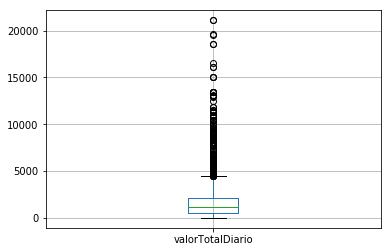

In [45]:
df[df['situacaoEmpenho'] == 0].boxplot(column= ['valorTotalDiario'])

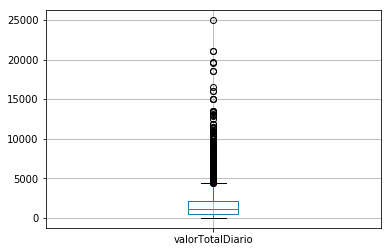

In [10]:
df.boxplot(column= ['valorTotalDiario'])

In [53]:
df[df['nEmpenho']  == 445.0]

,beneficiario,destino,exercicio,motivo,nEmpenho,periodo,situacaoEmpenho,unidadeOrcamentaria,valorTotalDiario
53,JOAO BATISTA BEZERRA MELO,BOA VIAGEM-CE,2014,REALIZAR SUPERVISAO EM INSTRUMENTOS DE MEDICAO...,445.0,05/05/2014 a 16/05/2014,0,19.203-INSTITUTO DE PESOS E MEDIDAS DE FORTALEZA,2114.16
441,DESIREE CUSTODIO MOTA,BRASILIA-DF,2014,AFIM DE PARTICIPAR DO FORUM BRASILEIRO DE CONT...,445.0,28/05/2014 a 31/05/2014,0,23.101-SECRETARIA MUNICIPAL DE FINANCAS,192.00
634,ALFRAN FERREIRA DE ARAUJO JUNIOR,AQUIRAZ-CE,2015,DESPESAS COM DIARIAS PARA SERVIDOR PARTICIPAR ...,445.0,23/11/2015 a 25/11/2015,0,28.101-SECRETARIA MUNICIPAL DO URBANISMO E MEI...,750.00
1619,PATRICIA HELENA NOBREGA STUDART,SAO LUIS-MA,2015,DIARIAS PARA PARTICIPAR DE REUNIAO REGIONAL DO...,445.0,05/05/2015 a 07/05/2015,0,31.901-FUNDO MUNICIPAL DE ASSISTENCIA SOCIAL,1140.00
1623,ARISTOTELES RIOS DA COSTA,SAO PAULO-SP,2015,PARTICIPAR DO 33O CONGRESSO INTERNACIONAL DE O...,445.0,21/01/2015 a 25/01/2015,0,18.203-INSTITUTO DE PREVIDENCIA DO MUNICIPIO -...,2250.00
1875,ANA CAROLINA DA COSTA DE MESQUITA,FOZ DO IGUACU-PR,2015,"VALOR REFERENTE AO COMPLETO DE DIARIAS , CONFO...",445.0,15/03/2015 a 19/03/2015,0,"18.101-SECRETARIA MUNICIPAL DO PLANEJAMENTO, O...",22.50
2432,FRANCISCO JOSE QUEIROZ MAIA FILHO,BRASILIA-DF,2016,"TRES (03) DIARIAS PARA BRASILIA, COM O OBJETIV...",445.0,23/11/2016 a 25/11/2016,1,11.101-GABINETE DO PREFEITO,1050.00
2971,RAIMUNDO NONATO LIMA DOS SANTOS,VICOSA DO CEARA-CE,2016,REALIZAR VERIFICACOES E FISCALIZACOES EM INSTR...,445.0,18/04/2016 a 29/04/2016,0,19.203-INSTITUTO DE PESOS E MEDIDAS,2500.08
3506,WALDINAR BATISTA DE MORAES,SAO GONCALO DO AMARANTE-CE,2017,DIARIAS PARA REALIZAR VERIFICACOES E FISCALIZA...,445.0,24/04/2017 a 29/04/2017,0,19.203-INSTITUTO DE PESOS E MEDIDAS,1318.08
6217,JOSE ANTONIO DE OLIVEIRA,AQUIRAZ-CE,2018,REALIZAR VERIFICACOES FISCALIZACOES EM INSTRUM...,445.0,28/05/2018 a 30/05/2018,0,19.203-INSTITUTO DE PESOS E MEDIDAS,336.33


In [12]:
names = df['beneficiario'].value_counts().index
mean_per_names = pd.DataFrame(columns = ['GastoTotal','QtdDiarias','Media'], index = names)


for i in names:
    aux_sum = sum(df[df['beneficiario'] == i]['valorTotalDiario'])
    aux_qtd = len(df[df['beneficiario'] == i])
    aux_mean = aux_sum/aux_qtd
    
    mean_per_names.set_value(i,'GastoTotal',aux_sum)
    mean_per_names.set_value(i,'QtdDiarias',aux_qtd)
    mean_per_names.set_value(i,'Media',aux_mean)

C:\Users\rafae\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

C:\Users\rafae\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

C:\Users\rafae\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [13]:
mean_per_names.sort_values(by = 'Media',ascending=False).head()

,GastoTotal,QtdDiarias,Media
EUDORO WALTER DE SANTANA,10440,1,10440
RACHEL MAGALHAES DE ABREU,20361.2,2,10180.6
JULIANA ALENCAR ALVES,17081.5,2,8540.73
LAURO BEZERRA NETO,8340,1,8340
CECILIA ELIA,16472,2,8236


In [24]:
print()
selectes_names = mean_per_names.sort_values(by = 'GastoTotal',ascending=False).head().index

for name in selectes_names:
    print(name)
    aux_df = df[(df['beneficiario'] == name) & (df['situacaoEmpenho'] == 0)].sort_values(by = 'valorTotalDiario', ascending=False).head()
    for i in range(len(aux_df)):

        print("R$",str(aux_df.iloc[i]['valorTotalDiario']))
        print(aux_df.iloc[i]['motivo'])
        print("--/",aux_df.iloc[i]['periodo'])
        print("-->",aux_df.iloc[i]['destino'])
        print("")
    print("---------------------------------------------")
    print(" ")


JULIO BRIZZI NETO
R$ 19632.0
REFERENTE A DOZE DIARIAS POR OCASIAO DE SUA VIAGEM INTERNACIONAL A ITALIA, PARA PARTICIPAR DO ENCERRAMENTO DO SEMINARIO PROJETO: 'JOVENS CONTRA A VIOLENCIA DE GENERO - JCVG'.                                                                                 
--/ 15/02/2016 a 26/02/2016
--> ITÁLIA-EX

R$ 12480.0
VIAGEM INTERNACIONAL PARA ROMENIA  INGLATERRA ESPANHA COM O OBJETIVO DE PARTICIPAR DA ABERTURA DO DO SEMINARIO INTERNACIONAL DO PROJETO  RECOGNIZE & CHANGE NA ROMENIA E ENCERRAMENTO DOS CURSOS DO PROGRAMA JUVENTUDE SEM FRONTEIRAS EM LIVERPOOL NA INGLATERR
--/ 22/09/2019 a 06/10/2019
--> ROMÊNIA-EX

R$ 11808.0
VALOR REFERENTE A CONCESSAO DE 09 (NOVE) DIARIAS, POR OCASIAO DE SUA VIAGEM PARA VANCOUVER E TORONTO (CANADA), COM O OBJETIVO DE ACOMPANHAR A EXECUCAO DO CONTRATO DO PROJETO 'JUVENTUDE SEM FRONTEIRAS', CONFORME ATO NO 287 2017 ANEXO.                      
--/ 09/06/2017 a 17/06/2017
--> CANADA-EX

R$ 10836.0
VALOR CORRESPONDENTE A CONCESSAO DE 07 

In [25]:
print()
selectes_names = mean_per_names.sort_values(by = 'Media',ascending=False).head().index

for name in selectes_names:
    print(name)
    aux_df = df[(df['beneficiario'] == name) & (df['situacaoEmpenho'] == 0)].sort_values(by = 'valorTotalDiario', ascending=False).head()
    for i in range(len(aux_df)):

        print("R$",str(aux_df.iloc[i]['valorTotalDiario']))
        print(aux_df.iloc[i]['motivo'])
        print("--/",aux_df.iloc[i]['periodo'])
        print("-->",aux_df.iloc[i]['destino'])
        print("")
    print("---------------------------------------------")
    print(" ")


EUDORO WALTER DE SANTANA
R$ 10440.0
ACOMPANHAR O PREFEITO E PARTICIPAR DO EVENTO  CITIES FOR LIFE GLOBAL MEETING 2015  EM MEDELLIN NA COLOMBIA.                                                                                                                                                    
--/ 29/08/2015 a 03/09/2015
--> MEDELLIN-EX

---------------------------------------------
 
RACHEL MAGALHAES DE ABREU
R$ 16065.66
PARTICIPACAO DA REUNIAO REGIONAL NORDESTE - 2 CICLO 2014. INMETRO                                                                                                                                                                                              
--/ 18/08/2014 a 23/08/2014
--> MACEIO-CE

R$ 4295.49
PARTICIPACAO DO ENCONTRO DIRAF COM A RBMLQ-I.                                                                                                                                                                                                                  
--/ 13/04/

346.0    14
229.0    14
58.0     14
148.0    14
57.0     13
Name: nEmpenho, dtype: int64

In [38]:
for ne in pd.value_counts(df["nEmpenho"]).head().index:
    aux_df = df[df['nEmpenho'] == ne].head()
    
    print(ne)
    for i in range(len(aux_df)):
        print(aux_df.iloc[i]['motivo'])
        print("")
                   
    print("------------------------------------------")
    print("")

346.0
ACOMPANHAR O SEC. EXECUTIVO DA CONTROLADORIA ETRANSPARENCIA WILFRIDO ROCHA E PARTICIPAR DE REU-NIAO COM A ASSOCIACAO CONTAS ABERTAS.                                                                                                                           

COM O OBJETIVO DE PARTICIPAR DE REUNIAO NO MINISTERIO DA ESPLANADA                                                                                                                                                                                             

DIARIAS REFERENTE A PARTICIPACAO DO SERVIDOR NO XXVI SIMPOSIO DE GEOLOGIA DO NORDESTE, NA CIDADE DE NATAL, RN.                                                                                                                                                 

REFERENTE DUAS DIARIAS POR OCASIAO DE SUA VIAGEM A BRASILIA COM O OBJETIVO DE PARTICIPAR DE REUNIAO NO MINISTERIO DAS CIDADES COM A PAUTA: PMCMV, PROJETO FAR LUIZ GONZAGA.                                                    